In [2]:
import pathlib
import pandas as pd
import glob
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from stmetric.utils import (get_sol_filepaths, 
                            get_sol_instrument, 
                            get_unique_instruments, 
                            get_sol_IMT, 
                            get_fname, 
                            get_sol_pitch_dynamics)

SOL_PATH = '/import/c4dm-datasets/SOL_0.9_HQ/'

meta_path = '/homes/cv300/Documents/timbre-metric/jasmp/'
SEED_FILELIST = os.path.join(meta_path, 'seed_filelist.csv')
SEED_FILELIST_PITCHED = os.path.join(meta_path, 'seed_filelist_pitched.csv')

EXT_FILELIST_PITCHED = os.path.join(meta_path, 'extended_pitch_F4.csv')
EXT_FILELIST = os.path.join(meta_path, 'extended_filelist.csv')
SIM = os.path.join(meta_path, 'sim.csv')
SIM_PITCHED = os.path.join(meta_path, 'sim_pitched.csv')

In [10]:
import numpy as np

In [8]:
df = pd.read_csv(SEED_FILELIST, index_col=0)
df_ext = pd.read_csv(EXT_FILELIST_PITCHED, index_col=0)
sim = pd.read_csv(SIM, header=None).to_numpy(dtype=np.float32)
dissim = sim

# seed stats

### dissim histogram

Text(0.5, 1.0, 'Histogram of dissimilarity scores')

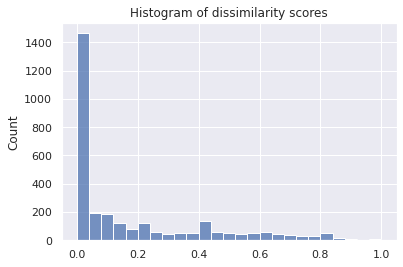

In [4]:
import matplotlib.pyplot as plt 
dissims = sim[np.triu_indices(sim.shape[0], k=1)]
sns.set(style="darkgrid")
sns.histplot(dissims, discrete=False)
plt.title('Histogram of dissimilarity scores')

### instrument counts

Text(0.5, 0, 'instrument')

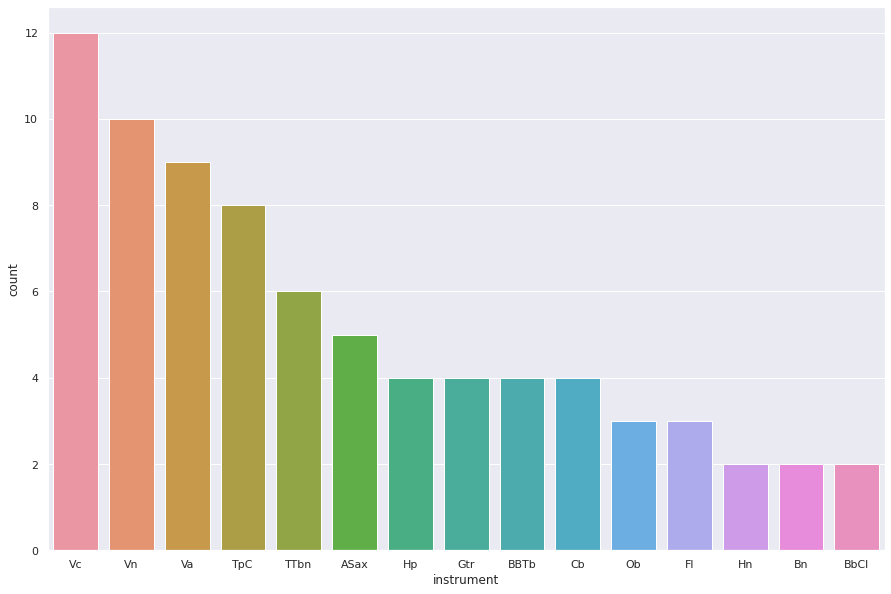

In [5]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
sns.barplot(data=df, x=df.instrument.value_counts().index, y=df.instrument.value_counts())
plt.ylabel('count')
plt.xlabel('instrument')

Text(0, 0.5, 'count')

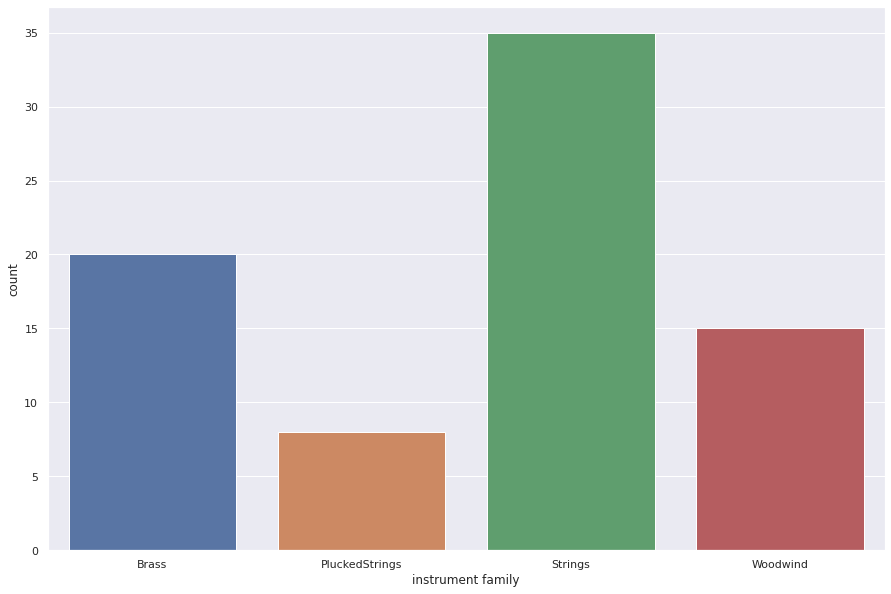

In [6]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
sns.barplot(data=df, x=df.groupby(['instrument family']).count()['IMT'].index, y=df.groupby(['instrument family']).count()['IMT'])
plt.ylabel('count')

### instrument family counts

### dynamics counts

### pitch counts

# extended stats

### instrument count

Text(0.5, 0, 'instrument')

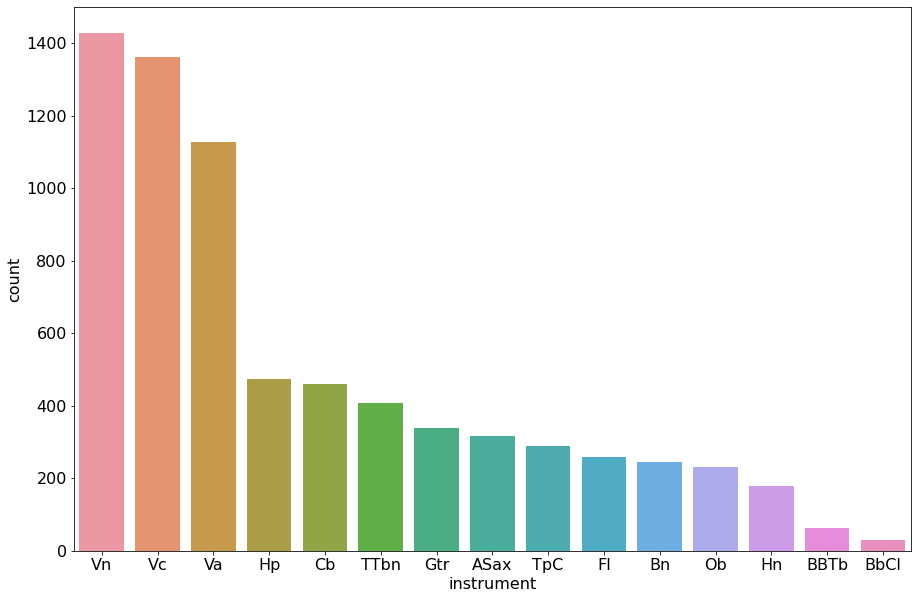

In [18]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
sns.barplot(data=df_ext, 
            x=df_ext.instrument.value_counts().index, 
            y=df_ext.instrument.value_counts())
plt.ylabel('count')
plt.xlabel('instrument')

### family count

Text(0, 0.5, 'count')

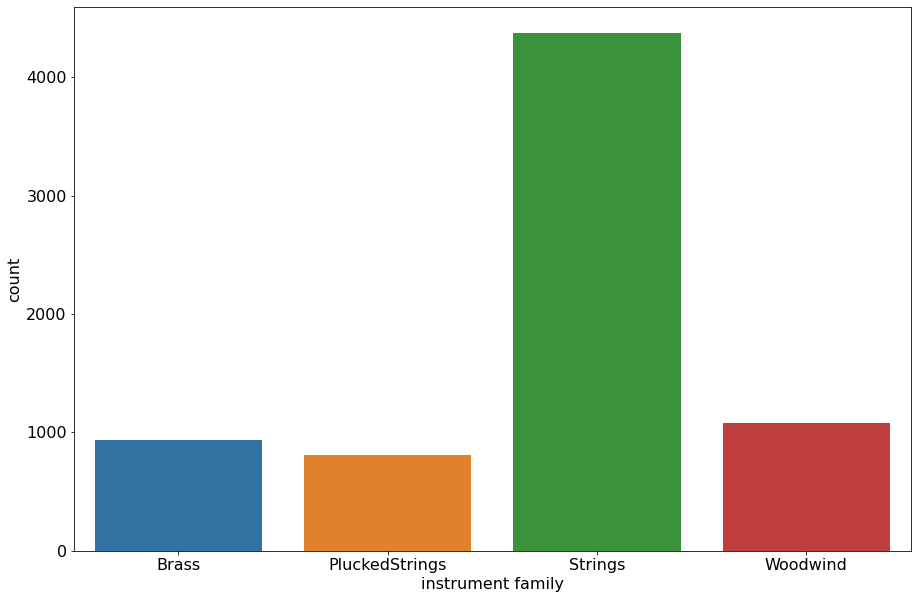

In [20]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
sns.barplot(data=df_ext, 
            x=df_ext.groupby(['instrument family']).count()['IMT'].index, 
            y=df_ext.groupby(['instrument family']).count()['IMT'])
plt.ylabel('count')

In [21]:
df_ext

,seed_id,filepath,instrument,IMT,pitch,dynamics,instrument family
0,8,Horns/Horn/ordinario/Hn-ord-B4-ff.wav,Hn,Hn-ord,B4,ff,Brass
1,8,Horns/Horn/ordinario/Hn-ord-D#5-pp.wav,Hn,Hn-ord,D#5,pp,Brass
2,8,Horns/Horn/ordinario/Hn-ord-C3-mf.wav,Hn,Hn-ord,C3,mf,Brass
3,8,Horns/Horn/ordinario/Hn-ord-B3-ff.wav,Hn,Hn-ord,B3,ff,Brass
4,8,Horns/Horn/ordinario/Hn-ord-C2-pp.wav,Hn,Hn-ord,C2,pp,Brass
...,...,...,...,...,...,...,...
7236,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-E1-mf-1...,BBTb,BBTb-slap,E1,mf,Brass
7237,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-F1-f.wav,BBTb,BBTb-slap,F1,f,Brass
7238,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-D1-mf-2...,BBTb,BBTb-slap,D1,mf,Brass
7239,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-D#1-mf-...,BBTb,BBTb-slap,D#1,mf,Brass


In [20]:
from stmetric.utils import load_audio_file
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython.display as ipd

def load_sol_pairs():
    w1 = widgets.IntSlider(min=0, max=len(df) - 1, step=1, value=0)
    w2 = widgets.IntSlider(min=0, max=len(df) - 1, step=1, value=0)
    def show_audio(i1, i2):
        for i in [i1, i2]:
            fpath = os.path.join(SOL_PATH, df.iloc[i]['fpath'])
            y, sr = load_audio_file(fpath)
            plt.figure()
            plot_cqt(np.array(y, dtype=np.float32), sr=sr)
            ipd.display(ipd.Audio(y, rate=sr))
        print(dissim[i1, i2])

    interact(show_audio, i1=w1, i2=w2);

interact(load_sol_pairs)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.load_sol_pairs()>

In [18]:
import librosa, librosa.display
def plot_cqt(y, hop_length=32, bins_per_octave=24, sr=44100, ax=None):
    cqt_kwargs = {
        "sr": sr,
        "fmin": 2**6,
        "bins_per_octave": bins_per_octave,
        "hop_length": hop_length,
    }
    CQT = librosa.cqt(y, n_bins=120, **cqt_kwargs)
    librosa.display.specshow((np.abs(CQT) ** 0.33), **cqt_kwargs, ax=ax)
    # plt.ylim(0, 75)

In [31]:
dissim[0, 1]

0.73333

In [41]:
x = np.load('/homes/cv300/Documents/timbre-metric/notebooks/lostanlen2020jasmp/experiments/similarity/ticelSimilarity.npz')
1 - (x['similarity'] / 31)

array([[0.        , 0.74193548, 0.74193548, ..., 0.96774194, 0.93548387,
        0.96774194],
       [0.74193548, 0.        , 0.16129032, ..., 1.        , 1.        ,
        1.        ],
       [0.74193548, 0.16129032, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.96774194, 1.        , 1.        , ..., 0.        , 0.74193548,
        0.64516129],
       [0.93548387, 1.        , 1.        , ..., 0.74193548, 0.        ,
        0.25806452],
       [0.96774194, 1.        , 1.        , ..., 0.64516129, 0.25806452,
        0.        ]])

### Viz

In [4]:
import scipy.io as sio, os
import pandas as pd
import gin
from stmetric.data.loaders import SOLTripletRatioDataset

sim = "/homes/cv300/Documents/timbre-metric/notebooks/lostanlen2020jasmp/experiments/similarity/ticelJudgments.mat"

meta_path = '/homes/cv300/Documents/timbre-metric/jasmp/'
mat = sio.loadmat(sim)
labels = mat['ensemble'][0]
SEED_FILELIST = os.path.join(meta_path, 'seed_filelist.csv')
df = pd.read_csv(SEED_FILELIST, index_col=0)

In [43]:
gin.enter_interactive_mode()
gin.parse_config_file('/homes/cv300/Documents/timbre-metric/gin/doce/sol_template.gin')
ds = SOLTripletRatioDataset(filter_instrs=None, k=None, feature='jtfs')

loading SOL features ...


In [21]:
import torch.nn.functional as F
pdists = F.pairwise_distance(ds.features, ds.features[:, None, :])

/tmp/ipykernel_234602/1744335216.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


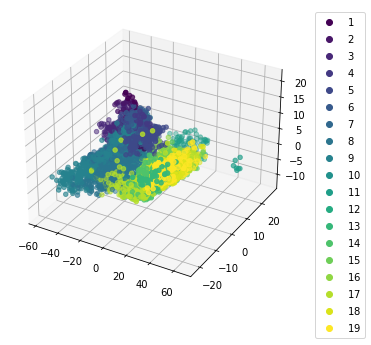

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X = pca.fit_transform(ds.features.numpy())


df_pca = pd.DataFrame(X, columns=['0', '1', '2'])
df_pca['cluster'] = labels[[f['seed_id'] for f in ds.filelist]]


fig = plt.figure()
ax = Axes3D(fig) 
sc = ax.scatter(df_pca['0'], df_pca['1'], df_pca['2'], c=df_pca['cluster'])
plt.legend(*sc.legend_elements(prop='colors', num=len(set(list(df_tsne['cluster'])))), 
           bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig('pca')

In [51]:
plt.show()
plt.savefig('pca.png')

<Figure size 432x288 with 0 Axes>

/tmp/ipykernel_234602/2886661081.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/tmp/ipykernel_234602/2886661081.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

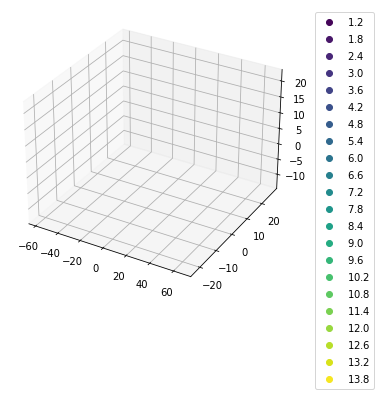

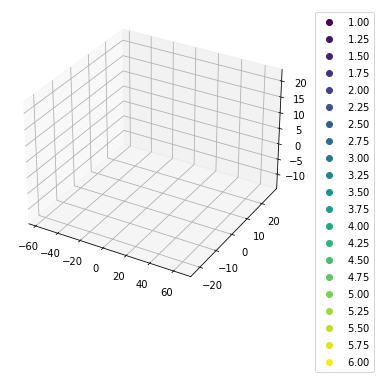

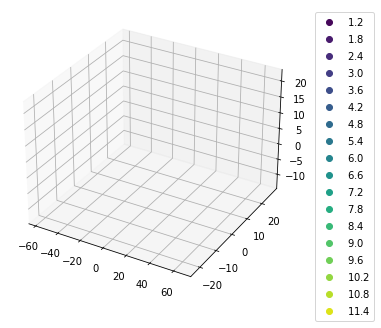

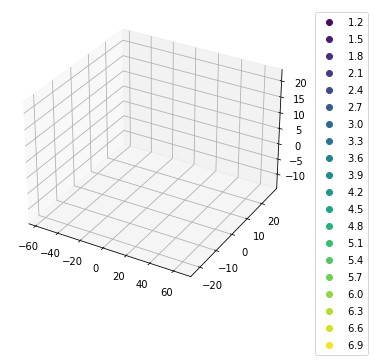

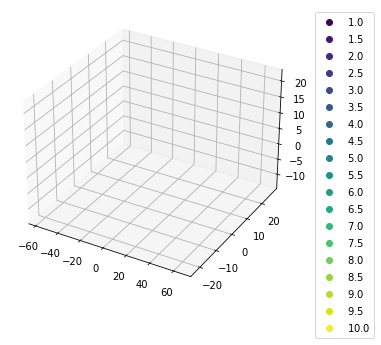

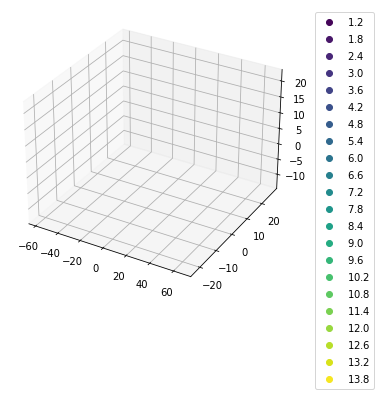

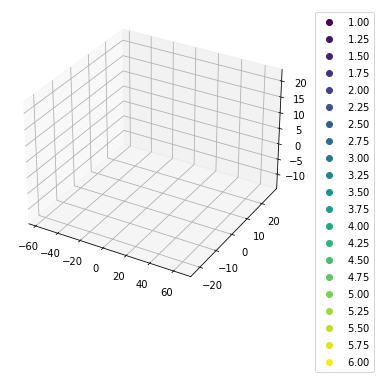

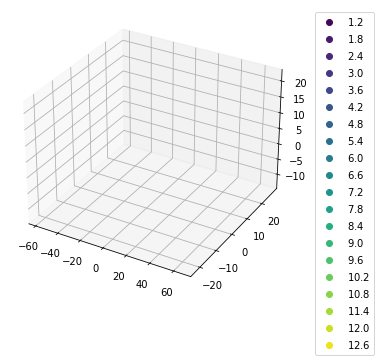

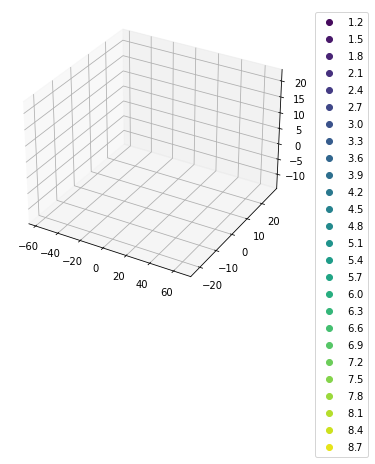

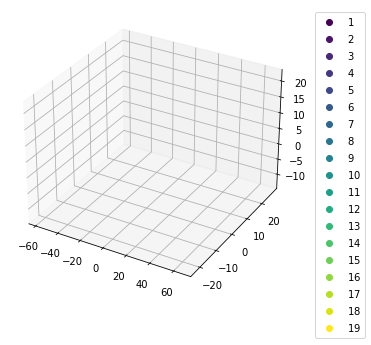

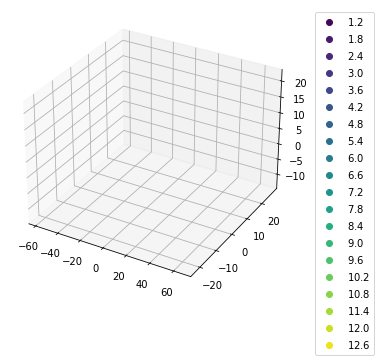

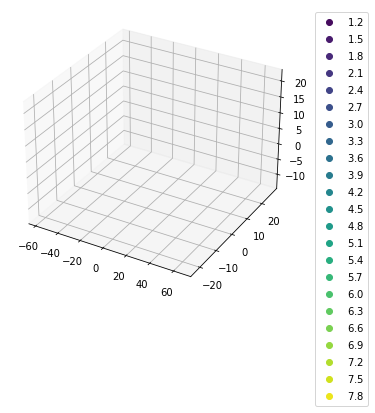

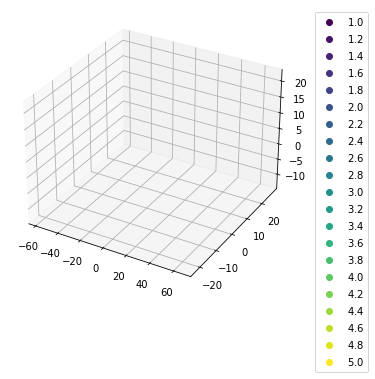

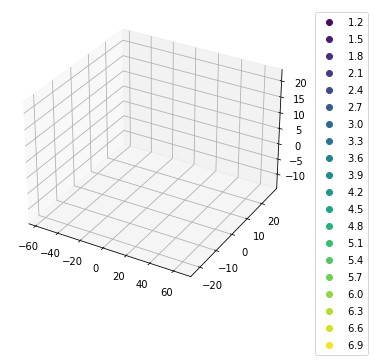

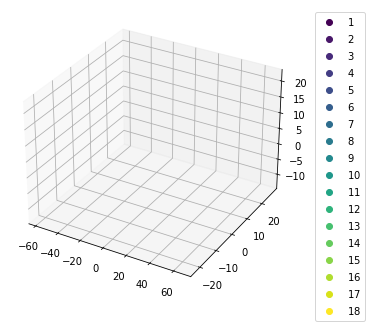

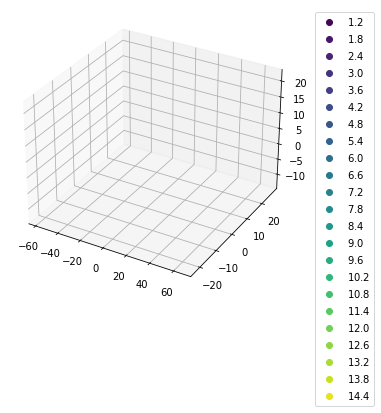

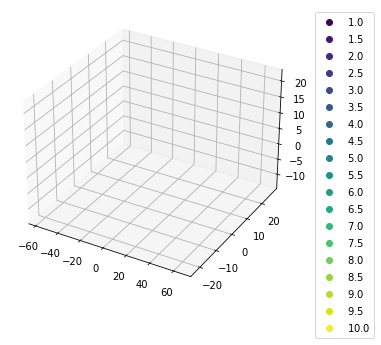

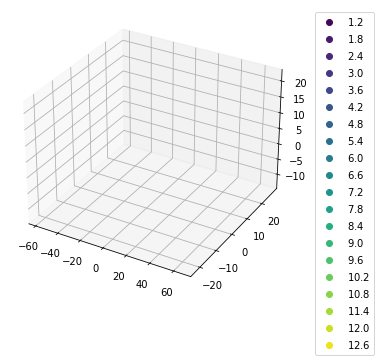

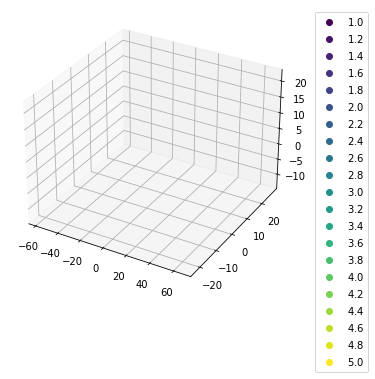

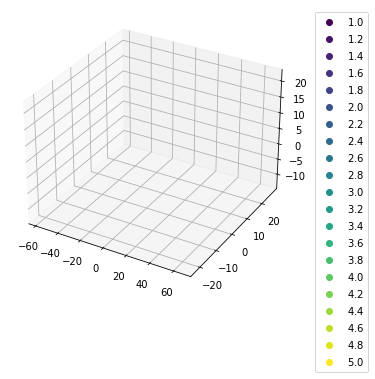

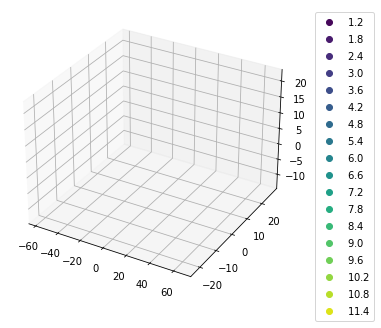

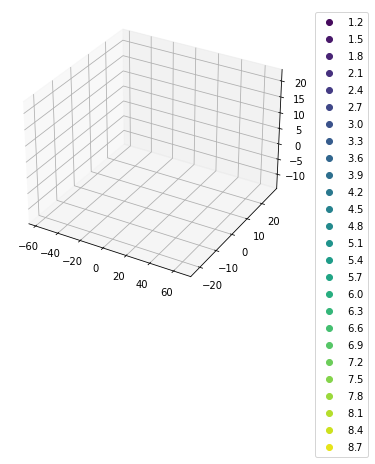

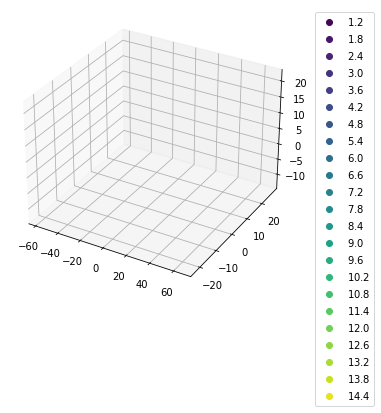

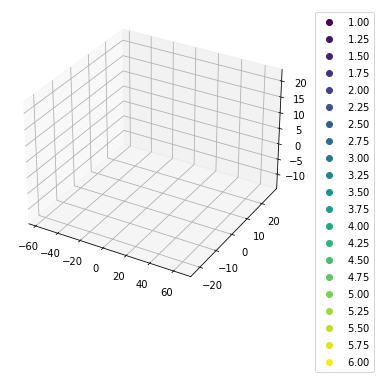

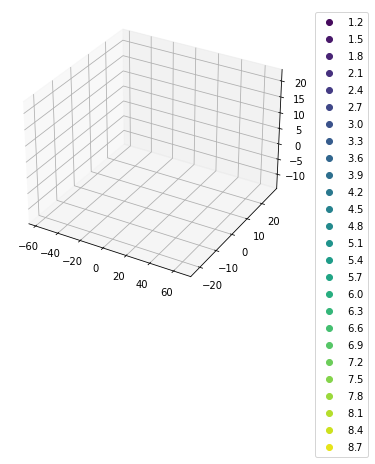

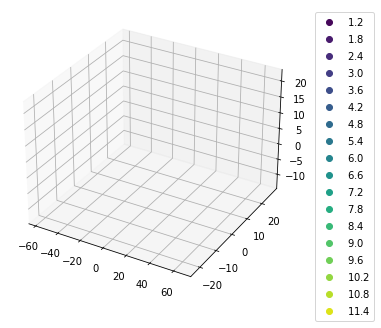

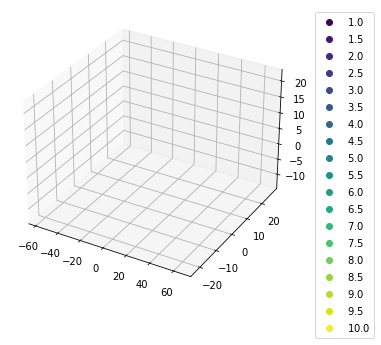

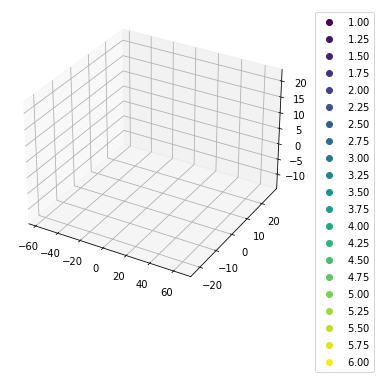

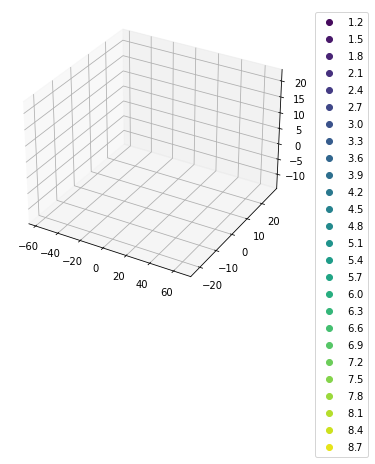

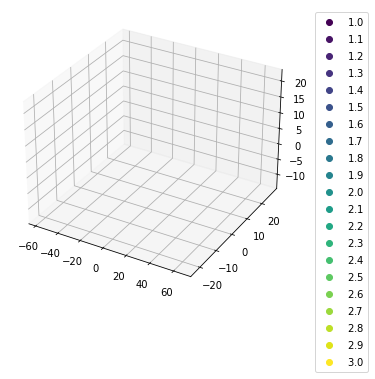

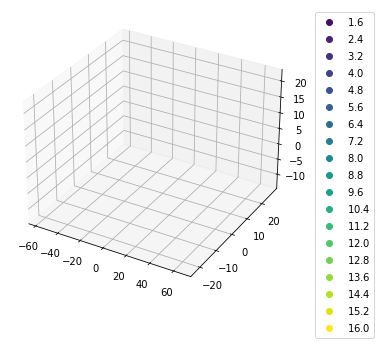

In [59]:
import matplotlib.animation as animation

fig = plt.figure()
scats = []
for x in mat['ci']:
    labels = x
    df_pca['cluster'] = labels[[f['seed_id'] for f in ds.filelist]]


    fig = plt.figure()
    ax = Axes3D(fig) 
    sc = ax.scatter(df_pca['0'], df_pca['1'], df_pca['2'], c=df_pca['cluster'])
    scats.append([sc])
    plt.legend(*sc.legend_elements(prop='colors', num=len(set(list(df_tsne['cluster'])))), 
               bbox_to_anchor=(1.05, 1), loc=2)
ani = animation.ArtistAnimation(fig, scats, interval=50, blit=True,
                                repeat_delay=500)
plt.show()
#     plt.savefig('pca')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, df_pca, numpoints=50):
        self.df_pca = df_pca
        self.numpoints = numpoints

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                          init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        ax = Axes3D(fig) 
        self.sc = ax.scatter(self.df_pca['0'], 
                             self.df_pca['1'], 
                             self.df_pca['2'], 
                             c=self.df_pca['cluster'])
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        self.scat.set_array(data[:, 3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,


if __name__ == '__main__':
    a = AnimatedScatter(df_pca)
    plt.show()

/homes/cv300/venvs/dptm-wyn/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/tmp/ipykernel_234602/3993478147.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


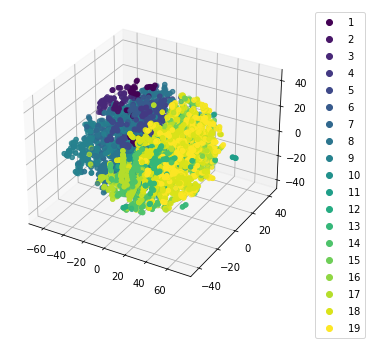

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, learning_rate='auto', init='pca', perplexity=3)
X = tsne.fit_transform(ds.features.numpy())
df_tsne = pd.DataFrame(X, columns=['0', '1', '2'])
df_tsne['cluster'] = labels[[f['seed_id'] for f in ds.filelist]]

fig = plt.figure()
ax = Axes3D(fig) 
sc = ax.scatter(df_tsne['0'], df_tsne['1'], df_tsne['2'], c=df_tsne['cluster'])
plt.legend(*sc.legend_elements(prop='colors', num=len(set(list(df_tsne['cluster'])))), 
           bbox_to_anchor=(1.05, 1), loc=2)

### Load seed extended pairs

In [1]:
from stmetric.utils import load_audio_file
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython.display as ipd
import pandas as pd

META_PATH = '/homes/cv300/Documents/timbre-metric/jasmp/'
EXTENDED_FPATH_DYNAMICS = os.path.join(META_PATH, 'extended_dynamics.csv')
SEED_FPATH = os.path.join(META_PATH, 'seed_filelist.csv')
EXTENDED_FPATH_PITCH = os.path.join(META_PATH, 'extended_pitch_5.csv')
# df_ext = pd.read_csv(EXTENDED_FPATH_DYNAMICS, index_col=0)
df_ext = pd.read_csv(EXTENDED_FPATH_PITCH, index_col=0)
df_seed = pd.read_csv(SEED_FPATH, index_col=0)

def load_sol_pairs():
    w1 = widgets.IntSlider(min=0, max=len(df_ext) - 1, step=1, value=0)
    def show_audio(i):
        seed_id = df_ext.iloc[i]['seed_id']
        ext_fpath = os.path.join(SOL_PATH, df_ext.iloc[i]['filepath'])
        seed_fpath = os.path.join(SOL_PATH, df_seed.iloc[seed_id]['fpath'])
        print(seed_fpath)
        print(ext_fpath)
        for fpath in [seed_fpath, ext_fpath]:
            y, sr = load_audio_file(fpath)
            ipd.display(ipd.Audio(y, rate=sr))

    interact(show_audio, i=w1);

interact(load_sol_pairs)

NameError: name 'os' is not defined

### JTFS visualization

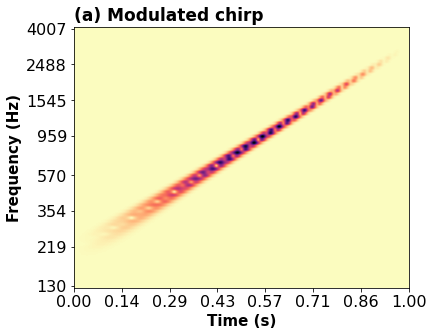

In [14]:
import numpy as np
from kymatio.numpy import TimeFrequencyScattering1D
from kymatio.toolkit import echirp, energy
from kymatio.visuals import plot, imshow
from kymatio import visuals
import librosa
import torch, os
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image



# scattering parameters
J = 12
Q = 16
T = 12
J_fr = 4
Q_fr = 2
F = 8
average_fr = True
pad_mode_fr = 'zero'
out_type = 'dict:array'
oversampling=2



def exp_chirp(duration=2, sr=2**14, f0=110, gamma=0.5):
    t = torch.arange(0, duration, 1/sr)
    phi = f0 / (gamma*np.log(2)) * (2 ** (gamma*t) - 1)
    return torch.sin(2*np.pi*phi)


def sinusoid(duration=2, sr=2**14, f0=110):
    t = torch.arange(0, duration, 1/sr)
    return torch.sin(2 * np.pi * f0 * t)


def generate(f_c, f_m, gamma=0.5, duration=2, sr=2**14):
    x_c = exp_chirp(duration=duration, sr=sr, gamma=gamma, f0=f_c) # carrier chirp
    x_m = sinusoid(duration, sr=sr, f0=f_m)
    x = x_c * x_m * torch.hann_window(duration * sr)
    return x



sr=2**13
x = generate(f_c=200, f_m=20, gamma=4, duration=1, sr=sr)
N = len(x)

params = dict(J=J, Q=Q, T=T, J_fr=J_fr, Q_fr=Q_fr, F=F, average_fr=average_fr,
              out_type=out_type, pad_mode_fr=pad_mode_fr, max_pad_factor=1,
              max_pad_factor_fr=1, oversampling=oversampling, oversampling_fr=2)
jtfs = TimeFrequencyScattering1D(shape=N, **params)
Scx = jtfs(x)



freqs = jtfs.meta()['xi']['S1'][:, -1]
freqs_ax = freqs[:80]*sr
freqs_ax = freqs_ax.astype(int)
oversampling=2
time_ax = np.array(list(range(1,Scx['S1'].squeeze().shape[1]))) * N/sr/Scx['S1'].squeeze().shape[1]

plt.rcParams.update({'font.size': 16})
imshow(Scx['S1'].squeeze()[:80,:], abs=1, w=.5, h=.4, yticks=freqs_ax, cmap='magma_r',
       xticks=time_ax, 
       xlabel="Time (s)",
       ylabel="Frequency (Hz)",
       title='(a) Modulated chirp')


KeyboardInterrupt: 

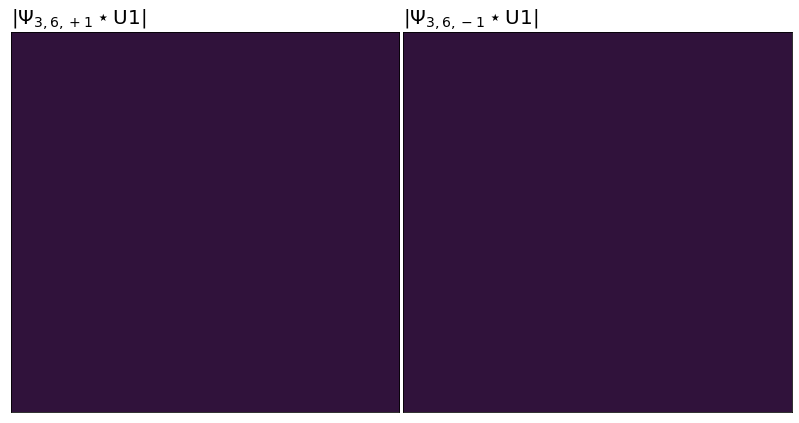

In [17]:
jmeta = jtfs.meta()
visuals.gif_jtfs_2d(Scx, jmeta, base_name='moduChirp', savedir=savedir, 
                    cmap='magma_r', save_images=1, overwrite=1, 
                    images_ext='.jpg')
Image(savedir+'moduChirp57.jpg')


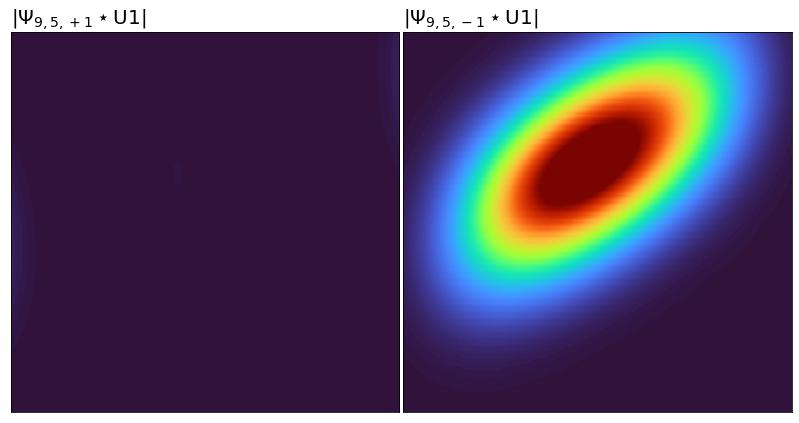

In [18]:
Image(savedir+'moduChirp57.jpg')

In [6]:
df['labels'] = labels

In [7]:
import seaborn as sns

sns.barplot(data=df, x='instrument family', hue=labels)

TypeError: Horizontal orientation requires numeric `x` variable.

In [27]:
df_ext.groupby(['instrument family', 'labels']).count()

seed_id  filepath  instrument   IMT  pitch  dynamics
instrument family labels                                                      
Brass             3            96        96          96    96     96        96
                  10          292       292         292   292    292       292
                  11          279       279         279   279    279       279
                  13          143       143         143   143    143       143
                  14          130       130         130   130    130       130
PluckedStrings    5           120       120         120   120    120       120
                  8           624       624         624   624    624       624
                  9            69        69          69    69     69        69
Strings           5           220       220         220   220    220       220
                  6           116       116         116   116    116       116
                  7           285       285         285   285    285       285
                  8           434       434         434   434    434       434
                  9           698       698         698   698    698       698
                  12           75        75          75    75     75        75
                  15          219       219         219   219    219       219
                  16          147       147         147   147    147       147
                  17           49        49          49    49     49        49
                  18         1526      1526        1526  1526   1526      1526
                  19          606       606         606   606    606       606
Woodwind          1            85        85          85    85     85        85
                  2            28        28          28    28     28        28
                  3            20        20          20    20     20        20
                  4            36        36          36    36     36        36
                  12          245       245         245   245    245       245
                  14          209       209         209   209    209       209
                  17          468       468         468   468    468       468

In [8]:
df_ext = pd.read_csv('/homes/cv300/Documents/timbre-metric/jasmp/extended_pitch_F4.csv', index_col=0)
{k: i for i, k in enumerate(set(df_ext['dynamics']))}
# (pp), piano (p), mezzo forte (mf ), forte (f ), and fortissimo (ff )

{'p': 0, 'pp': 1, 'mf': 2, 'mp': 3, 'ff': 4, 'f': 5}

In [14]:
df_ext.groupby(['dynamics', 'cluster']).count()

seed_id  filepath  instrument  IMT  pitch  instrument family
dynamics cluster                                                              
f        1             32        32          32   32     32                 32
         2             15        15          15   15     15                 15
         3              5         5           5    5      5                  5
         8             45        45          45   45     45                 45
         11            33        33          33   33     33                 33
ff       3             10        10          10   10     10                 10
         5            276       276         276  276    276                276
         6             53        53          53   53     53                 53
         7             95        95          95   95     95                 95
         8            268       268         268  268    268                268
         9            217       217         217  217    217                217
         10            43        43          43   43     43                 43
         11            71        71          71   71     71                 71
         12            83        83          83   83     83                 83
         14           100       100         100  100    100                100
         17           158       158         158  158    158                158
         18           490       490         490  490    490                490
         19           149       149         149  149    149                149
mf       1             32        32          32   32     32                 32
         3             83        83          83   83     83                 83
         4             16        16          16   16     16                 16
         5             64        64          64   64     64                 64
         6             63        63          63   63     63                 63
         7             95        95          95   95     95                 95
         8            401       401         401  401    401                401
         9            263       263         263  263    263                263
         10           205       205         205  205    205                205
         11            71        71          71   71     71                 71
         12           155       155         155  155    155                155
         13           143       143         143  143    143                143
         14           135       135         135  135    135                135
         15           219       219         219  219    219                219
         16           147       147         147  147    147                147
         17           199       199         199  199    199                199
         18           542       542         542  542    542                542
         19           305       305         305  305    305                305
mp       11            33        33          33   33     33                 33
p        1             12        12          12   12     12                 12
         2             13        13          13   13     13                 13
         3             18        18          18   18     18                 18
         8             75        75          75   75     75                 75
         9             69        69          69   69     69                 69
         17             4         4           4    4      4                  4
pp       1              9         9           9    9      9                  9
         4             20        20          20   20     20                 20
         7             95        95          95   95     95                 95
         8            269       269         269  269    269                269
         9            218       218         218  218    218                218
         10            44        44          44   44     44         

In [25]:
import scipy.io as sio, os
import pandas as pd
import gin
from stmetric.data.loaders import SOLTripletRatioDataset
import torch

sim = "/homes/cv300/Documents/timbre-metric/notebooks/lostanlen2020jasmp/experiments/similarity/ticelJudgments.mat"

mat = sio.loadmat(sim)
labels = mat['ensemble'][0]

In [38]:
df_ext

,seed_id,filepath,instrument,IMT,pitch,dynamics,instrument family
0,8,Horns/Horn/ordinario/Hn-ord-B4-ff.wav,Hn,Hn-ord,B4,ff,Brass
1,8,Horns/Horn/ordinario/Hn-ord-D#5-pp.wav,Hn,Hn-ord,D#5,pp,Brass
2,8,Horns/Horn/ordinario/Hn-ord-C3-mf.wav,Hn,Hn-ord,C3,mf,Brass
3,8,Horns/Horn/ordinario/Hn-ord-B3-ff.wav,Hn,Hn-ord,B3,ff,Brass
4,8,Horns/Horn/ordinario/Hn-ord-C2-pp.wav,Hn,Hn-ord,C2,pp,Brass
...,...,...,...,...,...,...,...
7236,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-E1-mf-1...,BBTb,BBTb-slap,E1,mf,Brass
7237,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-F1-f.wav,BBTb,BBTb-slap,F1,f,Brass
7238,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-D1-mf-2...,BBTb,BBTb-slap,D1,mf,Brass
7239,57,Tubas/Bass-Tuba/slap-pitched/BBTb-slap-D#1-mf-...,BBTb,BBTb-slap,D#1,mf,Brass


In [45]:
df_ext['cluster'] = [labels[seed_id] for seed_id in list(df_ext['seed_id'])]

In [46]:
df_ext['cluster'].value_counts()

18    1526
8     1058
9      767
19     606
17     517
5      340
14     339
12     320
10     292
7      285
11     279
15     232
16     147
13     143
3      125
6      116
1       85
4       36
2       28
Name: cluster, dtype: int64